In [19]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd 

In [20]:
f = pd.read_excel('kopia 21.xlsx')
f = [np.array(f[f.columns[x]].values.tolist()) for x in range(8)]
c=[list(range(20,26)),[0.99821, 0.99800, 0.99777, 0.99754, 0.99730, 0.99705]]
f

[array([1., 2., 3., 4., 5., 6., 7.]),
 array([30.74, 31.4 , 30.73, 30.25, 30.14, 25.88, 31.7 ]),
 array([20., 19., 21., 22., 19., 20., 20.]),
 array([51.04, 48.48, 48.26, 48.37, 51.66, 49.4 , 49.63]),
 array([21., 21., 20., 25., 20., 24., 23.]),
 array([58.18, 55.76, 55.26, 55.03, 58.39, 53.69, 56.1 ]),
 array([30., 25., 20., 15., 10.,  5.,  0.]),
 array([ 0.,  5., 10., 15., 20., 25., 30.])]

In [21]:
masa_wody=f[5]-f[1]
masa_org=f[3]-f[1]
rho_wody=[]
for i in range(len(f[4])):
    rho_wody.append(i)
    for j in range(len(c[1])):    
        if c[0][j]==f[4][i]:
            rho_wody[i]=c[1][j]
rho_wody=np.array(rho_wody)
rho_org=masa_org*rho_wody/masa_wody

In [22]:
k=np.array([[0.6790,	0.16700],
[0.9540,	0.32100],
[1.0140,	0.44000],
[0.9940,	0.54500],
[0.9150,	0.63800],
[0.7710,	0.73300],
[0.6150,	0.80700],
[0.4270,	0.87600],
[0.2190,	0.94100]])
k=np.transpose(k)

In [23]:
M_act=58.080
M_hex=86.177
n_act=f[7]*rho_org[6]/M_act
n_hex=f[6]*rho_org[0]/M_hex
chi_act=n_act/(n_act+n_hex)
chi_hex=n_hex/(n_act+n_hex)
n=n_act+n_hex

In [24]:
nadmiar_obj=chi_act*M_act*((1/rho_org)-(1/rho_org[6]))+chi_hex*M_hex*((1/rho_org)-(1/rho_org[0]))


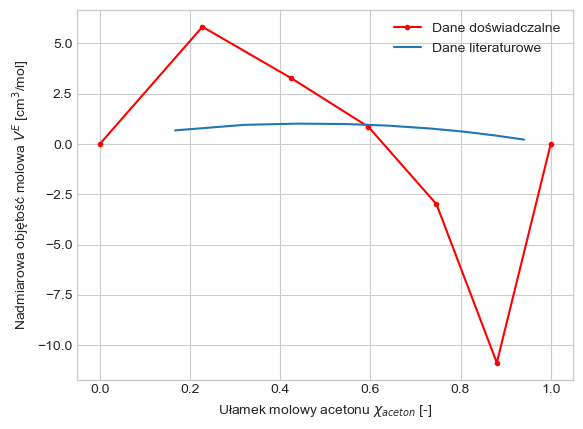

In [26]:
plt.plot(chi_act,nadmiar_obj,marker='.',color='r', label='Dane doświadczalne')
plt.plot(k[1],k[0], label='Dane literaturowe')
plt.style.use('seaborn-whitegrid')
plt.xlabel("Ułamek molowy acetonu $\chi_{aceton}$ [-]")
plt.ylabel("Nadmiarowa objętość molowa $V^E$ [cm$^3$/mol]")
plt.legend(loc='best')
plt.show()